In [20]:
# Gerekli kütüphaneleri içe aktarıyoruz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Veri setini okuyoruz kaç satır ve sutundan oluştuğunu listeliyoruz
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [ ]:
Veri tiplerine bakıyoruz

In [22]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
Veri hakkında bilgi sahibi olmak için bir kaç satırı görüntülüyoruz

In [23]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [5]:
Boş veri var mı diye kontrol ediyoruz ,Boş veri varsa ortalama ile dolduruyoruz 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
veri seti ile ilgili açıklama: age (yaş), sex (cinsiyet), cp (göğüs ağrısı tipi), trestbps (dinlenme kan basıncı), chol (kolesterol), fbs (açlık kan şekeri), restecg (dinlenme elektrokardiyogramı),
thalach (maksimum kalp atış hızı), exang (egzersiz kaynaklı anjin), oldpeak (dinlenme durumuna göre egzersiz kaynaklı ST segmenti depresyonu), 
slope (egzersiz kaynaklı ST segmentinin eğimi), ca (ana damarlarda renkli floroskopi ile görülen daralmaların sayısı) ve thal (talyum stres testi sonucu) gibi değişkenler
kalp hastalığı ile ilişkilidir. Ayrıca, target (hedef) değişkeni, kişinin kalp hastalığı olup olmadığını gösterir.

In [25]:
# Veri setini bağımsız ve bağımlı değişkenlere ayırın
X = df.drop("target", axis=1) # Bağımsız değişkenler (özellikler)
y = df["target"] # Bağımlı değişken (hedef)

# Veri setini eğitim ve test olarak bölümlendirin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
Kullanacağımız modeller için gerekli kütüphaneleri dahil ediyoruz

In [26]:
# Scikit-learn Kütüphanesi
from sklearn.linear_model import LogisticRegression # Lojistik Regresyon
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.tree import DecisionTreeClassifier # Karar Ağacı
from sklearn.svm import SVC # Destek Vektör Makinesi
from sklearn.neural_network import MLPClassifier # Yapay Sinir Ağı
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.ensemble import RandomForestClassifier # Rastgele Orman

# Tensorflow ve Keras Kütüphaneleri
import tensorflow as tf
from tensorflow import keras

In [27]:
# Modellerin çıktılarını ekrana yazdırıyoruz
def writeInfo():
    # Modelin performansını ölçün
    print("Modelin doğruluk oranı:", accuracy_score(y_test, y_pred))
    print("Modelin karışıklık matrisi:")
    print(confusion_matrix(y_test, y_pred))
    print("Modelin sınıf bazında performans raporu:")
    print(classification_report(y_test, y_pred))

In [29]:
# Lojistik regresyon modeli oluşturun
model = LogisticRegression(C=1.0, solver="lbfgs",max_iter=1000)

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.8634146341463415
Modelin karışıklık matrisi:
[[ 77  21]
 [  7 100]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [30]:
# k-NN modeli oluşturun
model = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.7463414634146341
Modelin karışıklık matrisi:
[[74 24]
 [28 79]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        98
           1       0.77      0.74      0.75       107

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



In [31]:
# Karar ağacı modeli oluşturun
model = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.8975609756097561
Modelin karışıklık matrisi:
[[ 82  16]
 [  5 102]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        98
           1       0.86      0.95      0.91       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [32]:
# Destek vektör makinesi modeli oluşturun
model = SVC(C=1.0, kernel="rbf", gamma="scale")

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.7463414634146341
Modelin karışıklık matrisi:
[[66 32]
 [20 87]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        98
           1       0.73      0.81      0.77       107

    accuracy                           0.75       205
   macro avg       0.75      0.74      0.74       205
weighted avg       0.75      0.75      0.74       205



In [33]:
# Yapay sinir ağı modeli oluşturun
model = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", max_iter=200)

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.8195121951219512
Modelin karışıklık matrisi:
[[ 66  32]
 [  5 102]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        98
           1       0.76      0.95      0.85       107

    accuracy                           0.82       205
   macro avg       0.85      0.81      0.81       205
weighted avg       0.84      0.82      0.82       205



In [34]:
# Naive Bayes modeli oluşturun
model = GaussianNB()

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.8536585365853658
Modelin karışıklık matrisi:
[[79 19]
 [11 96]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [35]:
# Rastgele orman modeli oluşturun
model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5)

# Modeli eğitim verisi üzerinde eğitin
model.fit(X_train, y_train)

# Modelin test verisi üzerindeki tahminlerini elde edin
y_pred = model.predict(X_test)
writeInfo()

Modelin doğruluk oranı: 0.9463414634146341
Modelin karışıklık matrisi:
[[ 89   9]
 [  2 105]]
Modelin sınıf bazında performans raporu:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
EDA, veri setinin sağlıklı bir şekilde analiz edilmesi ve yorumlanması için gerekli olan temel bir adımdır. 
EDA, veri setindeki eksik verileri, aykırı değerleri, dağılımı, korelasyonu ve diğer özellikleri ortaya çıkarır.
Bu bilgiler, sınıflandırma algoritmasının daha iyi sonuçlar vermesi için veri setinin temizlenmesi, dönüştürülmesi ve seçilmesi gibi işlemlerde kullanılabilir.
Özetle, EDA ve sınıflandırma algoritması farklı amaçlar için kullanılan farklı tekniklerdir.
EDA, veri setini anlamak için kullanılırken, sınıflandırma algoritması, veri setini kategorilere ayırmak için kullanılır. 
EDA, sınıflandırma algoritmasından bağımsız olarak yapılabilir, ancak sınıflandırma algoritmasının başarısını artırmak için yararlıdır. 

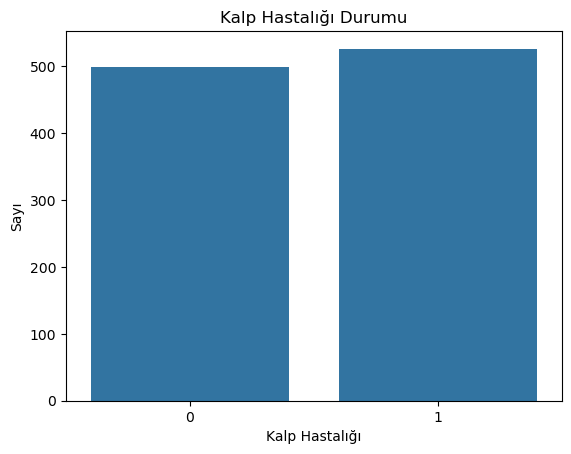

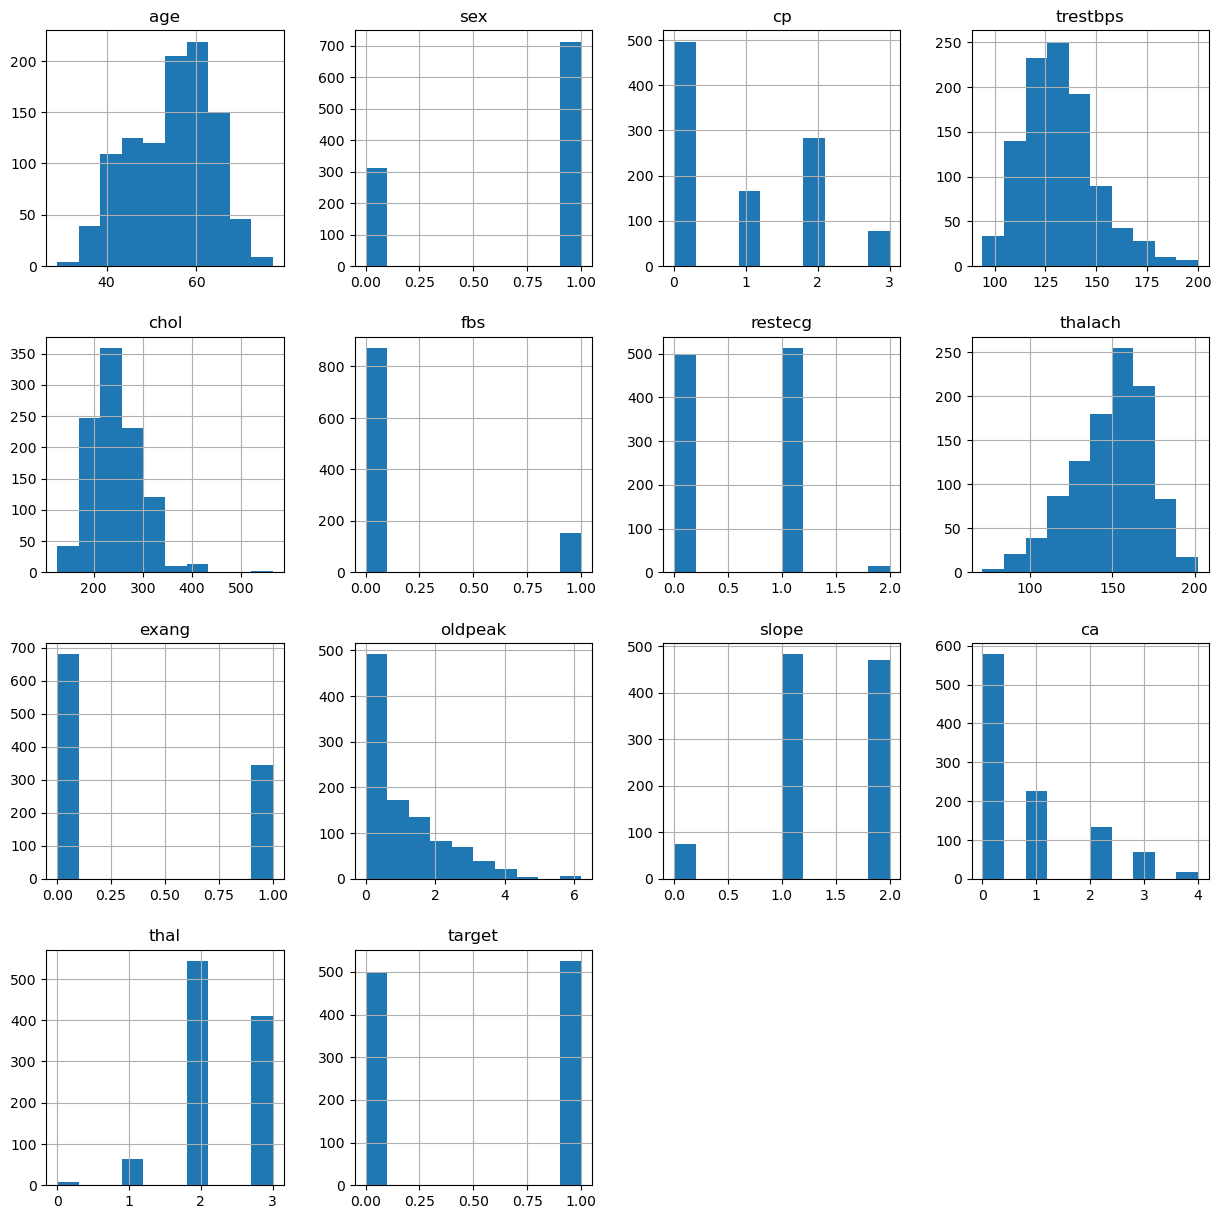

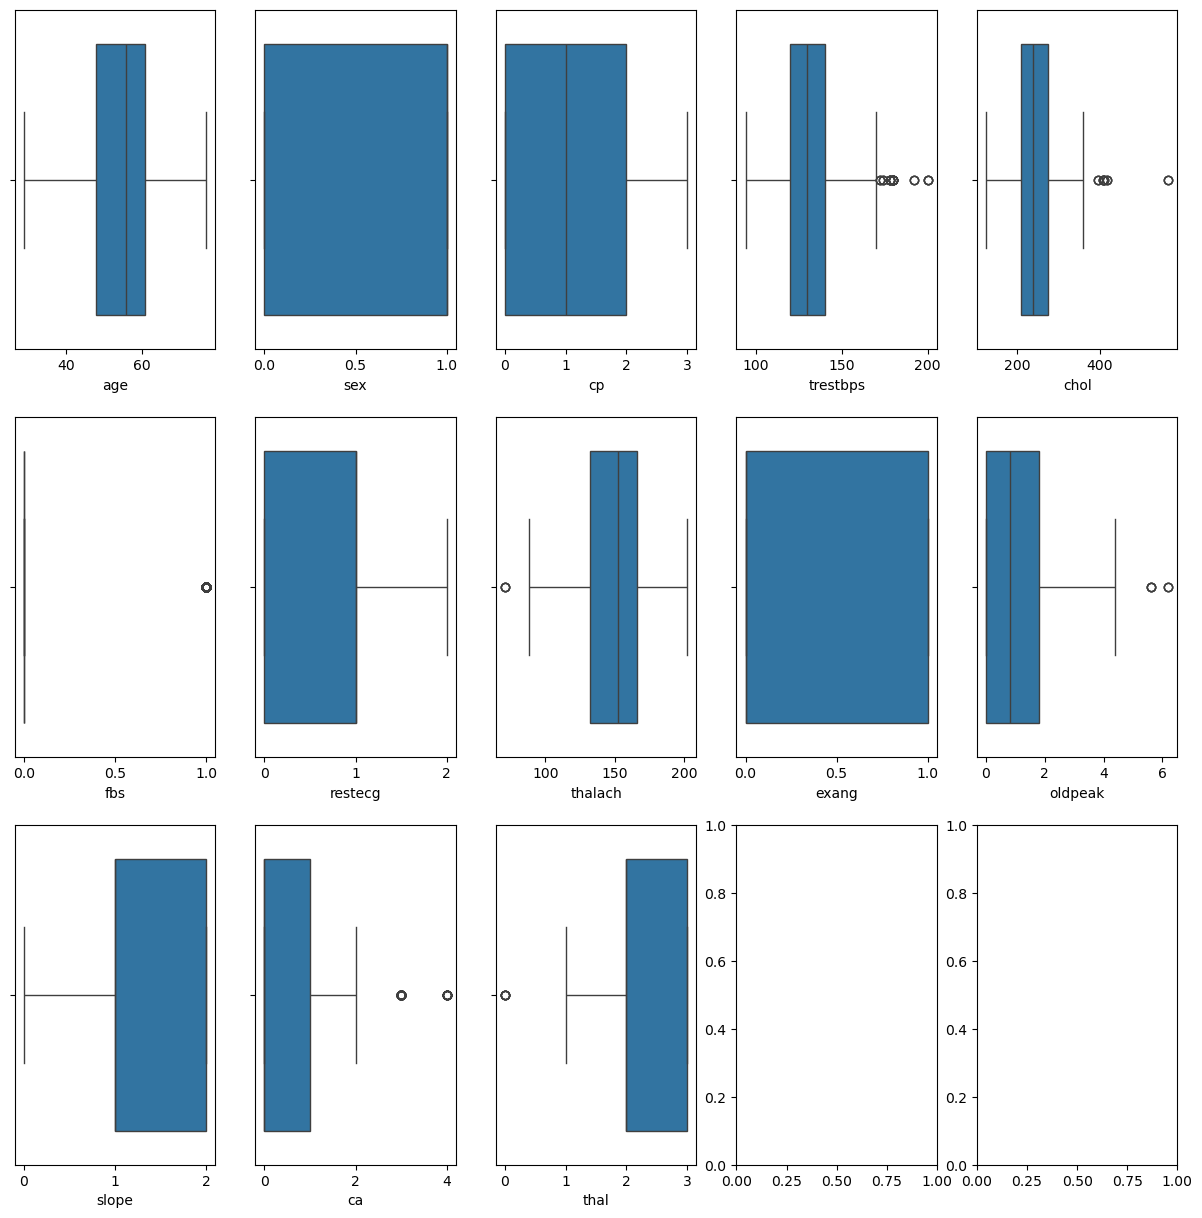

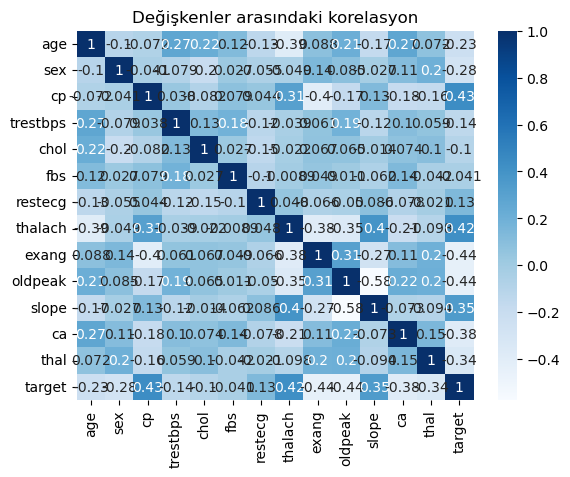

In [36]:
#EDA Analizi Yapıyoruz
# Hedef değişkenin dağılımını görüntüleme
sns.countplot(x="target", data=df)
plt.title("Kalp Hastalığı Durumu")
plt.xlabel("Kalp Hastalığı")
plt.ylabel("Sayı")
plt.show()

# Hedef değişkenin yüzde dağılımını hesaplama
df["target"].value_counts(normalize=True) * 100

# Bağımsız değişkenlerin dağılımlarını görüntüleme
df.hist(figsize=(15,15))
plt.show()

# Bağımsız değişkenlerin istatistiksel özetlerini görüntüleme
df.describe()

# Aykırı değerleri tespit etmek için kutu grafikleri çizme
fig, ax = plt.subplots(3, 5, figsize=(15,15))
sns.boxplot(x="age", data=df, ax=ax[0,0])
sns.boxplot(x="sex", data=df, ax=ax[0,1])
sns.boxplot(x="cp", data=df, ax=ax[0,2])
sns.boxplot(x="trestbps", data=df, ax=ax[0,3])
sns.boxplot(x="chol", data=df, ax=ax[0,4])
sns.boxplot(x="fbs", data=df, ax=ax[1,0])
sns.boxplot(x="restecg", data=df, ax=ax[1,1])
sns.boxplot(x="thalach", data=df, ax=ax[1,2])
sns.boxplot(x="exang", data=df, ax=ax[1,3])
sns.boxplot(x="oldpeak", data=df, ax=ax[1,4])
sns.boxplot(x="slope", data=df, ax=ax[2,0])
sns.boxplot(x="ca", data=df, ax=ax[2,1])
sns.boxplot(x="thal", data=df, ax=ax[2,2])
plt.show()

# Değişkenler arasındaki korelasyonu hesaplama ve ısı haritası çizme
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Değişkenler arasındaki korelasyon")
plt.show()

# Hedef değişken ile bağımsız değişkenler arasındaki ilişkileri görmek için grup

In [31]:
# Hedef değişken ile bağımsız değişkenler arasındaki ilişkileri görmek için gruplama ve çapraz tablo analizi

# Hedef değişken ile sayısal bağımsız değişkenler arasındaki ilişkiyi görmek için gruplama
# Hedef değişkene göre sayısal bağımsız değişkenlerin ortalamalarını hesaplama
df.groupby("target").mean()

# Hedef değişken ile kategorik bağımsız değişkenler arasındaki ilişkiyi görmek için çapraz tablo analizi
# Hedef değişkene göre kategorik bağımsız değişkenlerin frekanslarını ve yüzdelerini hesaplama
pd.crosstab(df["target"], df["sex"])
pd.crosstab(df["target"], df["sex"], normalize="index") * 100
pd.crosstab(df["target"], df["cp"])
pd.crosstab(df["target"], df["cp"], normalize="index") * 100
pd.crosstab(df["target"], df["fbs"])
pd.crosstab(df["target"], df["fbs"], normalize="index") * 100
pd.crosstab(df["target"], df["restecg"])
pd.crosstab(df["target"], df["restecg"], normalize="index") * 100
pd.crosstab(df["target"], df["exang"])
pd.crosstab(df["target"], df["exang"], normalize="index") * 100
pd.crosstab(df["target"], df["slope"])
pd.crosstab(df["target"], df["slope"], normalize="index") * 100
pd.crosstab(df["target"], df["ca"])
pd.crosstab(df["target"], df["ca"], normalize="index") * 100
pd.crosstab(df["target"], df["thal"])
pd.crosstab(df["target"], df["thal"], normalize="index") * 100


thal,0,1,2,3
target,,,,
0,0.801603,8.617234,26.452906,64.128257
1,0.570342,3.992395,78.326996,17.110266
